In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [8]:
cust_df = pd.read_csv("./train_data/train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [9]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [10]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print(f'unsatisfied 비율은 {(unsatisfied_cnt / total_cnt):0.2f}')

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [11]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [12]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

x_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print(f'피처 데이터 shape: {x_features.shape}')

피처 데이터 shape: (76020, 369)


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_features, y_labels, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(f'학습 세트 Shape: {x_train.shape}, 테스트 세트 Shape: {x_test.shape}')

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts() / train_cnt)
print('테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts() / test_cnt)

학습 세트 Shape: (60816, 369), 테스트 세트 Shape: (15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64
테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

xgb_clf.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(x_train, y_train), (x_test, y_test)])

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

ValueError: continuous-multioutput format is not supported

In [25]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(x_test)[:, 1], average='macro')
print(f'ROC AUC: {xgb_roc_score:0.4f}')

ROC AUC: 0.8419


In [30]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth': [3, 5, 7, 9], 'min_child_weight': [1, 3], 'colsample_bytree': [0.25, 0.5, 0.75, 1]}

gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3, n_jobs=-1, verbose=1)
gridcv.fit(x_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(x_train, y_train), (x_test, y_test)])

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  4.8min finished


[0]	validation_0-auc:0.756487	validation_1-auc:0.75758
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.825163	validation_1-auc:0.818016
[2]	validation_0-auc:0.822373	validation_1-auc:0.814013
[3]	validation_0-auc:0.83678	validation_1-auc:0.82809
[4]	validation_0-auc:0.844609	validation_1-auc:0.831123
[5]	validation_0-auc:0.844684	validation_1-auc:0.829551
[6]	validation_0-auc:0.842909	validation_1-auc:0.826494
[7]	validation_0-auc:0.848728	validation_1-auc:0.831145
[8]	validation_0-auc:0.85389	validation_1-auc:0.834027
[9]	validation_0-auc:0.855702	validation_1-auc:0.833983
[10]	validation_0-auc:0.859003	validation_1-auc:0.834988
[11]	validation_0-auc:0.861835	validation_1-auc:0.836227
[12]	validation_0-auc:0.864279	validation_1-auc:0.836956
[13]	validation_0-auc:0.864876	validation_1-auc:0.837568
[14]	validation_0-auc:0.865426	validation_1-auc:0.836002
[1

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.25, 0.5, 0.75, 1],
                         'max_depth': [3, 5, 7, 9],
                         'min_child_weight': [1, 3]},
      

In [31]:
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.5, 'max_depth': 9, 'min_child_weight': 3}


In [36]:
xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:, 1], average='macro')
print(f'ROC AUC: {xgb_roc_score: 0.4f}')

ROC AUC:  0.8440


In [37]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=9, min_child_weight=3, colsample_bytree=0.5, reg_alpha=0.03)

xgb_clf.fit(x_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(x_train, y_train), (x_test, y_test)])

[0]	validation_0-auc:0.825392	validation_1-auc:0.817982
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.829328	validation_1-auc:0.817594
[2]	validation_0-auc:0.830901	validation_1-auc:0.818324
[3]	validation_0-auc:0.836544	validation_1-auc:0.824423
[4]	validation_0-auc:0.837112	validation_1-auc:0.825446
[5]	validation_0-auc:0.83651	validation_1-auc:0.822954
[6]	validation_0-auc:0.838549	validation_1-auc:0.823323
[7]	validation_0-auc:0.840499	validation_1-auc:0.824559
[8]	validation_0-auc:0.843427	validation_1-auc:0.829445
[9]	validation_0-auc:0.844727	validation_1-auc:0.830532
[10]	validation_0-auc:0.84621	validation_1-auc:0.831979
[11]	validation_0-auc:0.845519	validation_1-auc:0.831393
[12]	validation_0-auc:0.844895	validation_1-auc:0.830435
[13]	validation_0-auc:0.845396	validation_1-auc:0.830902
[14]	validation_0-auc:0.847112	validation_1-auc:0.832084

[141]	validation_0-auc:0.884013	validation_1-auc:0.839805
[142]	validation_0-auc:0.884036	validation_1-auc:0.839628
[143]	validation_0-auc:0.884084	validation_1-auc:0.839339
[144]	validation_0-auc:0.884156	validation_1-auc:0.839084
[145]	validation_0-auc:0.885103	validation_1-auc:0.839432
[146]	validation_0-auc:0.885525	validation_1-auc:0.839736
[147]	validation_0-auc:0.885692	validation_1-auc:0.839597
[148]	validation_0-auc:0.885801	validation_1-auc:0.839451
[149]	validation_0-auc:0.885924	validation_1-auc:0.839361
[150]	validation_0-auc:0.886023	validation_1-auc:0.839203
[151]	validation_0-auc:0.886011	validation_1-auc:0.83911
[152]	validation_0-auc:0.886238	validation_1-auc:0.839038
[153]	validation_0-auc:0.886202	validation_1-auc:0.838824
[154]	validation_0-auc:0.886722	validation_1-auc:0.839155
[155]	validation_0-auc:0.88691	validation_1-auc:0.838961
[156]	validation_0-auc:0.887503	validation_1-auc:0.839243
[157]	validation_0-auc:0.888104	validation_1-auc:0.839566
[158]	validation

[283]	validation_0-auc:0.915204	validation_1-auc:0.844802
[284]	validation_0-auc:0.915256	validation_1-auc:0.844768
[285]	validation_0-auc:0.915271	validation_1-auc:0.844697
[286]	validation_0-auc:0.915382	validation_1-auc:0.844805
[287]	validation_0-auc:0.915413	validation_1-auc:0.844792
[288]	validation_0-auc:0.915518	validation_1-auc:0.844795
[289]	validation_0-auc:0.915653	validation_1-auc:0.844801
[290]	validation_0-auc:0.915701	validation_1-auc:0.844771
[291]	validation_0-auc:0.91573	validation_1-auc:0.844759
[292]	validation_0-auc:0.915804	validation_1-auc:0.844866
[293]	validation_0-auc:0.91601	validation_1-auc:0.844812
[294]	validation_0-auc:0.916041	validation_1-auc:0.84478
[295]	validation_0-auc:0.916172	validation_1-auc:0.844732
[296]	validation_0-auc:0.916213	validation_1-auc:0.844791
[297]	validation_0-auc:0.916245	validation_1-auc:0.844789
[298]	validation_0-auc:0.916337	validation_1-auc:0.84488
[299]	validation_0-auc:0.916508	validation_1-auc:0.844832
[300]	validation_0

[425]	validation_0-auc:0.923928	validation_1-auc:0.844396
[426]	validation_0-auc:0.923985	validation_1-auc:0.84441
[427]	validation_0-auc:0.923996	validation_1-auc:0.844405
[428]	validation_0-auc:0.924027	validation_1-auc:0.844398
[429]	validation_0-auc:0.924046	validation_1-auc:0.844431
[430]	validation_0-auc:0.924155	validation_1-auc:0.84442
[431]	validation_0-auc:0.924195	validation_1-auc:0.844443
[432]	validation_0-auc:0.924211	validation_1-auc:0.844432
[433]	validation_0-auc:0.924248	validation_1-auc:0.844396
[434]	validation_0-auc:0.924262	validation_1-auc:0.84439
[435]	validation_0-auc:0.924338	validation_1-auc:0.844382
[436]	validation_0-auc:0.924448	validation_1-auc:0.844333
[437]	validation_0-auc:0.924515	validation_1-auc:0.844379
[438]	validation_0-auc:0.924529	validation_1-auc:0.844369
[439]	validation_0-auc:0.924599	validation_1-auc:0.844374
[440]	validation_0-auc:0.924688	validation_1-auc:0.844292
[441]	validation_0-auc:0.924772	validation_1-auc:0.84431
[442]	validation_0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.02, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=156,
              reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:, 1], average='macro')
print(f'ROC AUC: {xgb_roc_score: 0.4f}')

ROC AUC:  0.8440


In [39]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

xgb_clf.fit(x_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(x_train, y_train), (x_test, y_test)])

[0]	validation_0-auc:0.82311	validation_1-auc:0.815226
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.827094	validation_1-auc:0.816566
[2]	validation_0-auc:0.832027	validation_1-auc:0.820393
[3]	validation_0-auc:0.835873	validation_1-auc:0.825019
[4]	validation_0-auc:0.838197	validation_1-auc:0.826078
[5]	validation_0-auc:0.837948	validation_1-auc:0.827282
[6]	validation_0-auc:0.8381	validation_1-auc:0.826888
[7]	validation_0-auc:0.838475	validation_1-auc:0.827131
[8]	validation_0-auc:0.839775	validation_1-auc:0.828198
[9]	validation_0-auc:0.83981	validation_1-auc:0.827834
[10]	validation_0-auc:0.841664	validation_1-auc:0.828996
[11]	validation_0-auc:0.841069	validation_1-auc:0.82802
[12]	validation_0-auc:0.841167	validation_1-auc:0.828517
[13]	validation_0-auc:0.841455	validation_1-auc:0.828317
[14]	validation_0-auc:0.845308	validation_1-auc:0.834099
[1

[142]	validation_0-auc:0.878656	validation_1-auc:0.843428
[143]	validation_0-auc:0.878713	validation_1-auc:0.843385
[144]	validation_0-auc:0.878905	validation_1-auc:0.843463
[145]	validation_0-auc:0.879131	validation_1-auc:0.843475
[146]	validation_0-auc:0.87937	validation_1-auc:0.843636
[147]	validation_0-auc:0.879459	validation_1-auc:0.843606
[148]	validation_0-auc:0.879425	validation_1-auc:0.843573
[149]	validation_0-auc:0.879568	validation_1-auc:0.843621
[150]	validation_0-auc:0.879684	validation_1-auc:0.843523
[151]	validation_0-auc:0.879746	validation_1-auc:0.843485
[152]	validation_0-auc:0.879772	validation_1-auc:0.84348
[153]	validation_0-auc:0.87969	validation_1-auc:0.843363
[154]	validation_0-auc:0.880169	validation_1-auc:0.843571
[155]	validation_0-auc:0.880258	validation_1-auc:0.84347
[156]	validation_0-auc:0.88067	validation_1-auc:0.84353
[157]	validation_0-auc:0.880969	validation_1-auc:0.843364
[158]	validation_0-auc:0.881349	validation_1-auc:0.843599
[159]	validation_0-a

[284]	validation_0-auc:0.903908	validation_1-auc:0.844534
[285]	validation_0-auc:0.903983	validation_1-auc:0.844493
[286]	validation_0-auc:0.904128	validation_1-auc:0.844469
[287]	validation_0-auc:0.904224	validation_1-auc:0.844478
[288]	validation_0-auc:0.904337	validation_1-auc:0.844413
[289]	validation_0-auc:0.904409	validation_1-auc:0.844408
[290]	validation_0-auc:0.904532	validation_1-auc:0.844505
[291]	validation_0-auc:0.904571	validation_1-auc:0.84446
[292]	validation_0-auc:0.904651	validation_1-auc:0.844474
[293]	validation_0-auc:0.904717	validation_1-auc:0.84443
[294]	validation_0-auc:0.904796	validation_1-auc:0.844373
[295]	validation_0-auc:0.9049	validation_1-auc:0.844322
[296]	validation_0-auc:0.904981	validation_1-auc:0.844269
[297]	validation_0-auc:0.9051	validation_1-auc:0.844265
[298]	validation_0-auc:0.905163	validation_1-auc:0.844253
[299]	validation_0-auc:0.905254	validation_1-auc:0.844185
[300]	validation_0-auc:0.905318	validation_1-auc:0.84414
[301]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0,
              learning_rate=0.02, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=156,
              reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:, 1], average='macro')
print(f'ROC AUC: {xgb_roc_score: 0.4f}')

ROC AUC:  0.8440


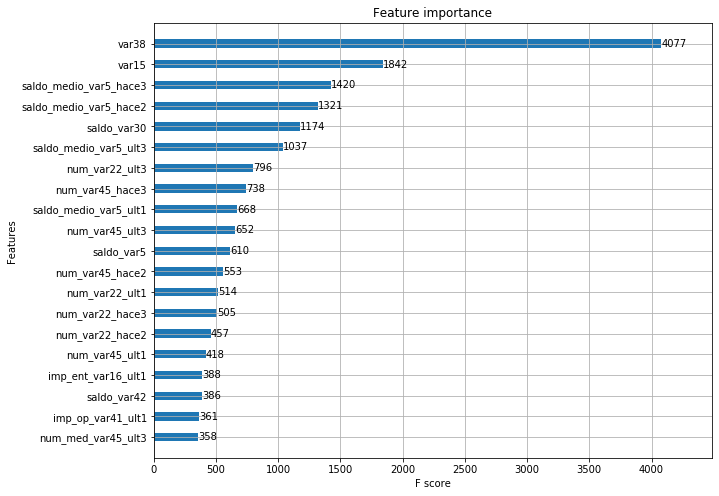

In [41]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

In [42]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(x_test, y_test)]
lgbm_clf.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [43]:
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(x_test)[:, 1], average='macro')
print(f'ROC AUC: {lgbm_roc_score:0.4f}')

ROC AUC: 0.8396


In [47]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)

params={
    'num_leaves': [32, 64, 128],
    'max_depth': [96, 128, 160],
    'min_child_samples': [60, 100, 140],
    'subsample': [0.6, 0.8, 1]
}

gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3, n_jobs=-1, verbose=2)
gridcv.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(x_train, y_train), (x_test, y_test)])

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  1.8min finished


[1]	training's auc: 0.857677	training's binary_logloss: 0.154848	valid_1's auc: 0.816188	valid_1's binary_logloss: 0.164618
Training until validation scores don't improve for 30 rounds
[2]	training's auc: 0.86467	training's binary_logloss: 0.148693	valid_1's auc: 0.825051	valid_1's binary_logloss: 0.15946
[3]	training's auc: 0.869399	training's binary_logloss: 0.144081	valid_1's auc: 0.828762	valid_1's binary_logloss: 0.155627
[4]	training's auc: 0.874489	training's binary_logloss: 0.140384	valid_1's auc: 0.832915	valid_1's binary_logloss: 0.15266
[5]	training's auc: 0.876736	training's binary_logloss: 0.137433	valid_1's auc: 0.833346	valid_1's binary_logloss: 0.150418
[6]	training's auc: 0.879931	training's binary_logloss: 0.134877	valid_1's auc: 0.834674	valid_1's binary_logloss: 0.148606
[7]	training's auc: 0.883093	training's binary_logloss: 0.132629	valid_1's auc: 0.835993	valid_1's binary_logloss: 0.14709
[8]	training's auc: 0.885716	training's binary_logloss: 0.130647	valid_1's 

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=200,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [96, 128, 160],
                         'min_child_sample

In [50]:
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:, 1], average='macro')
print(f'ROC AUC: {lgbm_roc_score:0.4f}')

GridSearchCV 최적 파라미터: {'max_depth': 96, 'min_child_samples': 100, 'num_leaves': 128, 'subsample': 0.6}
ROC AUC: 0.8374


In [59]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_samples=100, max_depth=128)

evals = [(x_test, y_test)]
lgbm_clf.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss:

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=128,
               min_child_samples=100, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=1000, n_jobs=-1, num_leaves=32,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.8, subsample_for_bin=200000,
               subsample_freq=0)

In [60]:
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(x_test)[:, 1], average='macro')
print(f'ROC AUC: {lgbm_roc_score:0.4f}')

ROC AUC: 0.8442
